<a href="https://colab.research.google.com/github/tomishing/python_data_science_basics/blob/main/Linear_regression_with_categorical_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression model with Categorical Variables

In [ ]:
# load libraries

from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

In [ ]:
# load data

mpg = pd.read_csv('auto-mpg.csv')
mpg = mpg.dropna()
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Convert year to categorical dummies
- Converting categorical variables to numerical dummies is also called **One Hot Encoding** in machine learning.

- Dropping the first column when creating dummy variables (using drop_first=True) is a common technique to avoid multicollinearity, especially when using these dummies in linear regression models.

- **perfect linear dependency** among the variables: Classc case of **multicollinearity**.
- In regression, this causes the design matrix to be singular, making the linear model estimation unstable or impossible (due to non-invertible matrices).

| yr\_70 | yr\_71 | yr\_72 | yr\_73 |
| ------ | ------ | ------ | ------ |
| 1      | 0      | 0      | 0      |
| 0      | 1      | 0      | 0      |
| 0      | 0      | 1      | 0      |
| 0      | 0      | 0      | 1      |

- How `drop_first=True` helps:
If you drop the first dummy (say, yr_70), you avoid this problem:

| yr\_71 | yr\_72 | yr\_73 |                                                   |
| ------ | ------ | ------ | ------------------------------------------------- |
| 0      | 0      | 0      | → this row means the category is actually `yr_70` |
| 1      | 0      | 0      | → `yr_71`                                         |
| 0      | 1      | 0      | → `yr_72`                                         |
| 0      | 0      | 1      | → `yr_73`                                         |

- `drop_first=True` avoids dummy variable trap — a situation where your model suffers from perfect multicollinearity due to including all categories as dummies. Dropping one category keeps the information intact while preserving model stability.



### The design matrix

In a linear regression model like:

$y = X\beta + ϵ$


- y: response variable (vector)
- X: design matrix (matrix of predictors, including a column of 1s for intercept)
- β: vector of coefficients
- ϵ: error term

The design matrix
X contains all your predictors (e.g., dummy variables, numeric features, etc.).


### What does it mean for the matrix to be singular?

A matrix is singular if it does not have an inverse.

In regression, the coefficients $\hat\beta$ are estimated as:

$$
\hat\beta = (X^TX)^{-1}X^Ty
$$

If X is singular (i.e., $X^TX$ is not invertible), this calculation fails. It means you can't solve for $\hat\beta$. This is exactly what happens when there's **perfect multicollinearity**.


### What is multicollinearity

Multicollinearity refers to a situation in multiple regression where two or more predictor (independent) variables are highly correlated with each other. In simple terms, it means that one predictor can be linearly predicted from the others with a substantial degree of accuracy.

- **perfect multicollinearity**: columns of X are linearly dependent -> matrix $X^T$ is singular

- **High multicollinearity**: $X^TX$ is almost singular

In [ ]:
# Generate categorical dummies from model year
# Drop first to avoid multicollinearity

year_dummies = pd.get_dummies(mpg['model year'], prefix='yr', drop_first=True)
year_dummies.head(5)

,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# combine weight and year dummies into feature matrix
X = pd.concat([mpg['weight'], year_dummies], axis=1)
X.head(5)

,weight,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82
0,3504,False,False,False,False,False,False,False,False,False,False,False,False
1,3693,False,False,False,False,False,False,False,False,False,False,False,False
2,3436,False,False,False,False,False,False,False,False,False,False,False,False
3,3433,False,False,False,False,False,False,False,False,False,False,False,False
4,3449,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# convert boolean to integer

X = X.astype(int)
X.head(5)

,weight,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82
0,3504,0,0,0,0,0,0,0,0,0,0,0,0
1,3693,0,0,0,0,0,0,0,0,0,0,0,0
2,3436,0,0,0,0,0,0,0,0,0,0,0,0
3,3433,0,0,0,0,0,0,0,0,0,0,0,0
4,3449,0,0,0,0,0,0,0,0,0,0,0,0


### Linear model

In [ ]:
X = sm.add_constant(X)
y = mpg['mpg'].values
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     155.7
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          4.52e-144
Time:                        20:55:37   Log-Likelihood:                -1017.3
No. Observations:                 398   AIC:                             2063.
Df Residuals:                     384   BIC:                             2118.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2176      0.903     43.440      0.000      37.443      40.993
weight        -0.0064      0.000    -31.480      0.000      -0.007      -0.006
yr_71          1.1517      0.844      1.364      0.173      -0.509       2.812
yr_72          0.1624      0.841      0.193      0.847      -1.492       1.817
yr_73         -0.2946      0.774     -0.381      0.704      -1.817       1.228
yr_74          1.8554      0.855      2.171      0.031       0.175       3.536
yr_75          1.3260      0.827      1.602      0.110      -0.301       2.953
yr_76          2.0070      0.804      2.495      0.013       0.425       3.589
yr_77          3.2890      0.844      3.895      0.000       1.629       4.949
yr_78          3.1099      0.799      3.894      0.000       1.540       4.680
yr_79          5.3772      0.836      6.432      0.000       3.734       7.021
yr_80         10.0317      0.855     11.735      0.000       8.351      11.712
yr_81          7.2203      0.851      8.483      0.000       5.547       8.894
yr_82          8.1527      0.841      9.696      0.000       6.499       9.806
==============================================================================
Omnibus:                       22.530   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.291
Skew:                           0.339   Prob(JB):                     6.56e-10
Kurtosis:                       4.446   Cond. No.                     4.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred = model.predict(X)

## Plotting data and a regression line
`plt.subplot(nrows, ncols, index)`

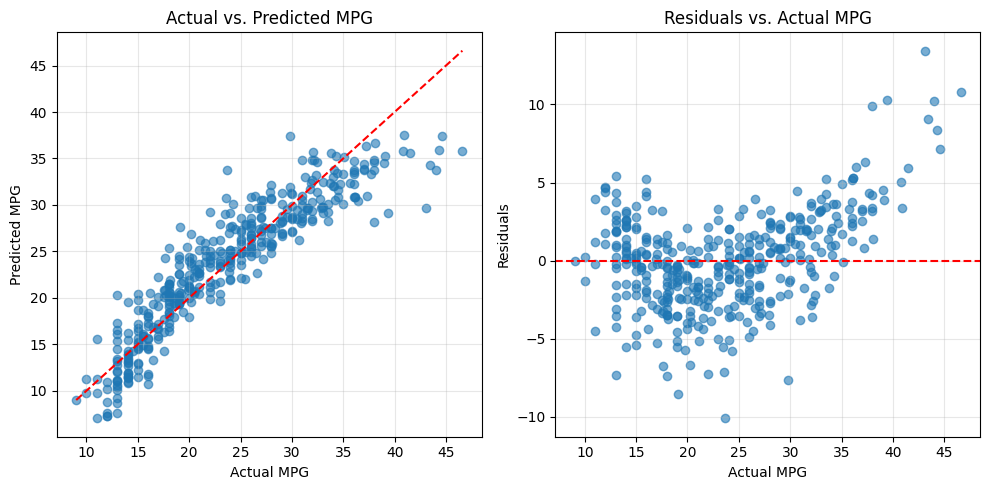

In [ ]:
plt.figure(figsize=(10, 5))

# Observed and predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs. Predicted MPG')

# `plt.plot(...)` is commonly used to draw a diagonal reference line on a plot.
# The line plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--'):
# Plots a line from the bottom-left to the top-right of the plot.
# r--' means the line is red (r) and dashed (--).
# plt.plot([x1, x2], [y1, y2])

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(alpha=0.3)

# Residuals
plt.subplot(1, 2, 2)
plt.scatter(y, y - y_pred, alpha=0.6)
plt.xlabel('Actual MPG')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual MPG')
plt.grid(alpha=0.3)
plt.axhline(y=0,color='r', linestyle='--')
plt.tight_layout()
plt.show()

## The model comparison


**X is a 2D array in `scikit-learn`**

1. `X = mpg['weight']`
- Type: pandas.Series
- Shape: (n_samples,) (1D)
- Description: This is a pandas Series, a one-dimensional labeled array.
- Use case: Good for simple operations or plotting, but not suitable for scikit-learn models, which expect 2D arrays for X.

2. `X1 = mpg['weight'].values.reshape(-1, 1)`
- Type: numpy.ndarray
- Shape: (n_samples, 1) (2D column vector)
- Description: This is a NumPy 2D array, with one - feature (column). It reshapes the 1D array to be 2D.
- Use case: Recommended for scikit-learn models like LinearRegression().fit(X, y).

**Y is a 1D array in `scikit-learn`**

- `y = mpg['mpg'].values`

In [ ]:
X = mpg['weight'].values.reshape(-1, 1)
X = sm.add_constant(X)
y = mpg['mpg'].values
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          2.97e-103
Time:                        20:59:20   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.000      44.754      47.881
x1            -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = mpg[['weight','model year']].values
X = sm.add_constant(X)
y = mpg['mpg'].values
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     830.4
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          3.26e-142
Time:                        20:59:26   Log-Likelihood:                -1054.3
No. Observations:                 398   AIC:                             2115.
Df Residuals:                     395   BIC:                             2127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1980      3.968     -3.578      0.000     -21.998      -6.398
x1            -0.0067      0.000    -31.161      0.000      -0.007      -0.006
x2             0.7566      0.049     15.447      0.000       0.660       0.853
==============================================================================
Omnibus:                       41.827   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.734
Skew:                           0.665   Prob(JB):                     1.19e-15
Kurtosis:                       4.541   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mpg = mpg.dropna()
origin_dummy=pd.get_dummies(mpg['origin'], prefix='or', drop_first=True)
origin_dummy = origin_dummy.astype(int)
X = pd.concat([mpg['weight'], origin_dummy], axis=1)
X = sm.add_constant(X)
y = mpg['mpg'].values

In [ ]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     308.6
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          4.86e-103
Time:                        20:59:58   Log-Likelihood:                -1142.0
No. Observations:                 398   AIC:                             2292.
Df Residuals:                     394   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6959      1.104     39.567      0.000      41.525      45.867
weight        -0.0070      0.000    -22.059      0.000      -0.008      -0.006
or_2           1.2155      0.652      1.863      0.063      -0.067       2.498
or_3           2.3554      0.662      3.558      0.000       1.054       3.657
==============================================================================
Omnibus:                       37.803   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.615
Skew:                           0.662   Prob(JB):                     1.38e-12
Kurtosis:                       4.242   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""